# Tools and Libraries

## Tensorflow

In [1]:
import tensorflow

# Handwritten Digits

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
#It tells the notebook to display matplotlib plots directly below the code cells that produce them, rather than in a separate window.
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist

## Loading Databaset using Keras
- Train and Split in Keras

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Each Image as 2D array of 28x28

len(x_train)
len(y_train)
len(x_test)
# X train and y_train are 2d arrays

10000

### MNIST
- Handwritten digits data in 2D form
- 0 means black 255 means white

In [17]:
print(len(x_train[0]))
print(x_train[0])
# This is 2D array

28
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198

### See Image using Matplot
- plt.matshow(2D array)

5


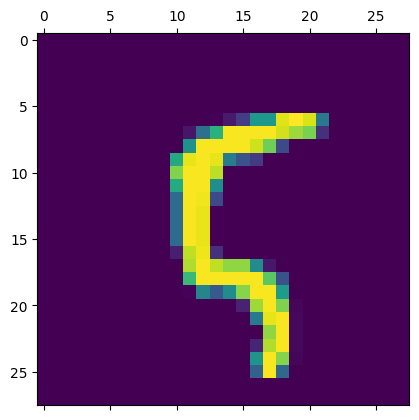

In [14]:
plt.matshow(x_train[100])
print(y_train[100])

### Flatten 2D array 28X28 into 1D array

In [18]:
x_train.shape
# number of rows
# each rows is 2d array

(60000, 28, 28)

In [22]:
# Want (60000,784)
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

In [27]:
x_train_flattened[0]
print(len(x_train_flattened[0]))

784


### Scaling the x_train data between 0 to 1
- Divide by 255

In [25]:
x_train_flattened = x_train_flattened/255

## Keras to Create Neural Network
- want 784 as x1 x2 ... .x784 to connect with 10 ouputs 0 to 1
- acitvation function = sigmoid
- Then training using data yeh sab

- Single layer input and output for now

In [46]:
# Dense(10): A fully connected layer with 10 neurons
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='softmax')
])

# If dont want to flatten image tell its 28*28
# Multiple layers hit and trial
# model = keras.Sequential([
      # keras.layers.Flatten(input_shape=(28,28))
#     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
#     keras.layers.Dense(10,activation='softmax')
# ])


# optimizer backward going to optain weight attain global minima
# loss fucntion ouput and predicted difference used to attain weights
# Gradient decent and cost function

# metric when neural network compile goal is accuracy input output differtence
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
# epochs number of iteration the neural network going to train data
model.fit(x_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8068 - loss: 0.7282
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9141 - loss: 0.3110
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9192 - loss: 0.2891
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9246 - loss: 0.2708
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9269 - loss: 0.2661


### Evaluating | Predicition Keral Model on Test Dataset

In [47]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9069 - loss: 50.1387


[44.793514251708984, 0.9192000031471252]

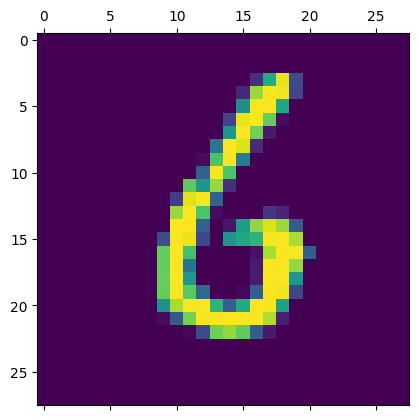

In [48]:
plt.matshow(x_test[50])

In [49]:
y_predict= model.predict(x_test_flattened)
print(y_predict[50])
# This is 10 neurons output probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0.         0.         0.         0.         0.         0.
 0.99999994 0.         0.         0.        ]


In [50]:
# Exact ouput based on 10 neurons
# np.argmax returns the index of the max probability, i.e., the predicted class.
print(np.argmax(y_predict[50]))

6


In [54]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Convert y_predicted into concrete class similar to y_test

In [55]:
y_predicted_labels = np.argmax(y_predict, axis=1)

In [56]:
y_predicted_labels[0:5]

array([7, 2, 1, 0, 4])

## Building Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predicted_labels)
print(conf_matrix)

# confusion_matrix = tf.math.confusion.matrix(labels=y_test, predictions=y_predicted_labels)
# confusion_matrix

[[ 962    0    0    2    0    2    6    2    6    0]
 [   0 1102    2    3    0    1    4    2   21    0]
 [   8    8  892   29    9    2   12    7   62    3]
 [   2    0    9  949    2    7    2    4   28    7]
 [   2    1    2    2  913    0   11    3   11   37]
 [  10    1    0   58   12  704   19    8   73    7]
 [  12    3    3    3    8    6  917    2    4    0]
 [   1    6   21   13   10    0    0  919    7   51]
 [   5    2    5   20    9   12    8    5  901    7]
 [  10    4    1   13   25    0    0    6   17  933]]


### Visualize using seaborn

In [59]:
import seaborn as sns

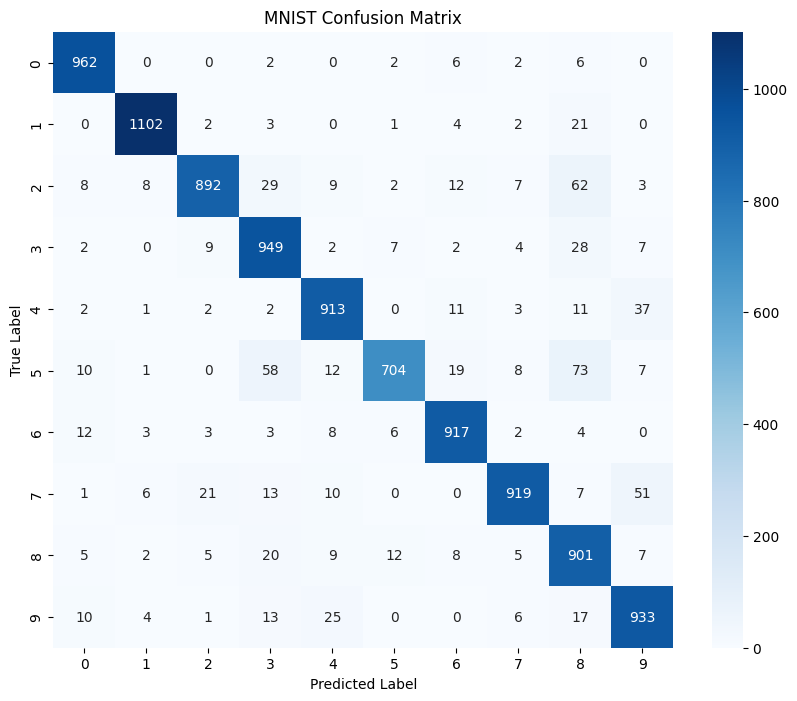

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MNIST Confusion Matrix')
plt.show()